<a href="https://colab.research.google.com/github/PanduDLaksono/PVCK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#koneksi ke google drive 

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


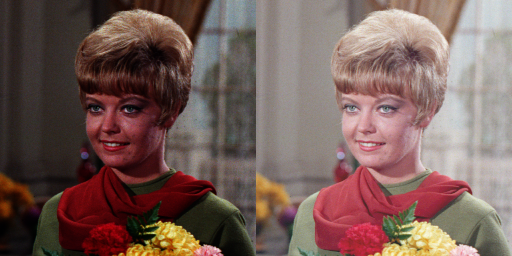

In [10]:
#gamma corection

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/female.tiff')

gamma_image_1 = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image_1[y,x,c] = np.clip(255*pow(original[y,x,c]/255,1/gamma),0,255)

final_frame = cv.hconcat((original,gamma_image_1))
cv2_imshow(final_frame)

 Bit Depth Pada Citra 
----------------------------------
Masukkan nilai depth: 4


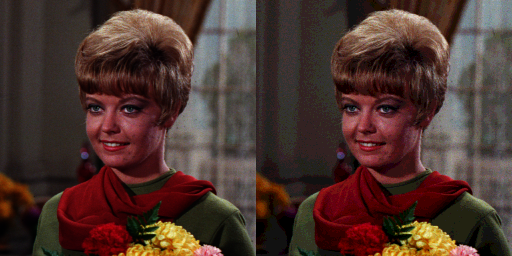

In [11]:
#image depth

print(' Bit Depth Pada Citra ')
print('----------------------------------')
try:
  bd = float(input('Masukkan nilai depth: '))
except ValueError:
  print('Error, not a number')

level = 255/((2**bd)-1)

depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      depth_image[y,x,c] = np.clip(round((original[y,x,c]/level))*level,0,255)

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)